# Working with Tweets

In this notebook, we will delve into the analysis of tweet contents.

We consider the dataset of tweets from Elon Musk, SpaceX and Tesla founder, and ask the following questions:
* What is Elon most actively tweeting about?
* Who is Elon most frequently referring to?

We will explore how to work with the contents of tweets.

In [13]:
# imports

import os, codecs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Let's get some basics (or a refresher) of working with texts in Python. Texts are sequences of discrete symbols (words or, more generically, tokens).

## Import the dataset
Let us import the Elon Musk's tweets dataset in memory.

<img src="images/elon_loop.jpeg" width="400px" heigth="400px">

In [3]:
# import the dataset using Pandas, and create a data frame

root_folder = "data"
df_elon = pd.read_csv(codecs.open(os.path.join(root_folder,"elonmusk_tweets.csv"), encoding="utf8"), sep=",")
df_elon['text'] = df_elon['text'].str[1:] #remove the starting 'b' from every tweet

In [4]:
df_elon.head(10)

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,'And so the robots spared humanity ... https:/...
1,848988730585096192,2017-04-03 20:01:01,"""@ForIn2020 @waltmossberg @mims @defcon_5 Exac..."
2,848943072423497728,2017-04-03 16:59:35,"'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,848935705057280001,2017-04-03 16:30:19,'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02 06:05:23,"""@DaveLeeBBC @verge Coal is dying due to nat g..."
5,848415731502923777,2017-04-02 06:04:07,"""@Lexxxzis It's just a helicopter in helicopte..."
6,848415356263702528,2017-04-02 06:02:38,"""@verge It won't matter"""
7,848398971139629057,2017-04-02 04:57:31,'@SuperCoolCube Pretty good'
8,848244577521647616,2017-04-01 18:44:01,"""Why did we waste so much time developing sill..."
9,848243350993895424,2017-04-01 18:39:09,'Technology breakthrough: turns out chemtrails...


In [5]:
df_elon.tail(5)

,id,created_at,text
2814,142881284019060736,2011-12-03 08:22:07,'That was a total non sequitur btw'
2815,142880871391838208,2011-12-03 08:20:28,"'Great Voltaire quote, arguably better than Tw..."
2816,142188458125963264,2011-12-01 10:29:04,'I made the volume on the Model S http://t.co/...
2817,142179928203460608,2011-12-01 09:55:11,"""Went to Iceland on Sat to ride bumper cars on..."
2818,15434727182,2010-06-04 18:31:57,"'Please ignore prior tweets, as that was someo..."


In [8]:
df_elon.shape # (number of rows, number of columns)

(2819, 3)

In [7]:
df_elon["text"].tolist()[:10] #convert a column to a list

["'And so the robots spared humanity ... https://t.co/v7JUJQWfCv'",
 '"@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that\'s irr\\xe2\\x80\\xa6 https://t.co/qQcTqkzgMl"',
 "'@waltmossberg @mims @defcon_5 Et tu, Walt?'",
 "'Stormy weather in Shortville ...'",
 '"@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It\'s basically dead."',
 '"@Lexxxzis It\'s just a helicopter in helicopter\'s clothing"',
 '"@verge It won\'t matter"',
 "'@SuperCoolCube Pretty good'",
 '"Why did we waste so much time developing silly rockets? Damn you, aliens! So obtuse! You have all this crazy tech, but can\'t speak English!?"',
 "'Technology breakthrough: turns out chemtrails are actually a message from time-traveling aliens describing the secret of teleportation'"]

## Working with tweet contents

In [14]:
# import some of the most popular libraries for NLP in Python
import nltk
import string
#import sklearn

In [15]:
#nltk.download('punkt')

A typical NLP pipeline might look like the following:
    
<img src="images/spacy_pipeline.png" width="600px" heigth="600px">

* Tokenization: split a text into tokens.
* Filtering: remove some of the tokens if not needed (e.g., punctuation). If and how to remove is task dependent.
* Tagger, parser: syntactic structure.
* NER (Named Entity Recognition): find named entities.
* ...

### Tokenization: splitting a text into constituent tokens.

In [16]:
# NLTK provides us with a tokenizers for tweets

from nltk.tokenize import TweetTokenizer, word_tokenize
tknzr = TweetTokenizer(preserve_case=True, reduce_len=False, strip_handles=False)

In [17]:
example_tweet = df_elon.text[1]
print(example_tweet)

"@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl"


A tokenizer takes a string and outputs a list of tokens.

We compare here two tokenizers: one for general English texts, and one specialized for tweets.

In [18]:
tkz1 = tknzr.tokenize(example_tweet)
print(tkz1)
print("\n======\n")
tkz2 = word_tokenize(example_tweet)
print(tkz2)

['"', '@ForIn2020', '@waltmossberg', '@mims', '@defcon_5', 'Exactly', '.', 'Tesla', 'is', 'absurdly', 'overvalued', 'if', 'based', 'on', 'the', 'past', ',', 'but', "that's", 'irr', '\\', 'xe2', '\\', 'x80', '\\', 'xa6', 'https://t.co/qQcTqkzgMl', '"']


['``', '@', 'ForIn2020', '@', 'waltmossberg', '@', 'mims', '@', 'defcon_5', 'Exactly', '.', 'Tesla', 'is', 'absurdly', 'overvalued', 'if', 'based', 'on', 'the', 'past', ',', 'but', 'that', "'s", 'irr\\xe2\\x80\\xa6', 'https', ':', '//t.co/qQcTqkzgMl', "''"]


**Question**: can you spot what the Twitter tokenizer is doing instead of a standard one?

### Filtering unnecessary tokens

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
# some more pre-processing

def filter_twt(tweet):
    
    # remove punctuation and short words and urls
    tweet = [t for t in tweet if t not in string.punctuation and len(t) > 3 and not t.startswith("http") and not t.startswith("www")]
    return tweet

def tokenize_and_string(tweet):
    
    tkz = tknzr.tokenize(tweet)
    
    tkz = filter_twt(tkz)
    
    return " ".join(tkz)

In [21]:
print(tkz1)
print("======")
print(filter_twt(tkz1))

['"', '@ForIn2020', '@waltmossberg', '@mims', '@defcon_5', 'Exactly', '.', 'Tesla', 'is', 'absurdly', 'overvalued', 'if', 'based', 'on', 'the', 'past', ',', 'but', "that's", 'irr', '\\', 'xe2', '\\', 'x80', '\\', 'xa6', 'https://t.co/qQcTqkzgMl', '"']
['@ForIn2020', '@waltmossberg', '@mims', '@defcon_5', 'Exactly', 'Tesla', 'absurdly', 'overvalued', 'based', 'past', "that's"]


In [22]:
df_elon["clean_text"] = df_elon["text"].apply(tokenize_and_string)

In [23]:
df_elon.head(5)

,id,created_at,text,clean_text
0,849636868052275200,2017-04-05 14:56:29,'And so the robots spared humanity ... https:/...,robots spared humanity
1,848988730585096192,2017-04-03 20:01:01,"""@ForIn2020 @waltmossberg @mims @defcon_5 Exac...",@ForIn2020 @waltmossberg @mims @defcon_5 Exact...
2,848943072423497728,2017-04-03 16:59:35,"'@waltmossberg @mims @defcon_5 Et tu, Walt?'",@waltmossberg @mims @defcon_5 Walt
3,848935705057280001,2017-04-03 16:30:19,'Stormy weather in Shortville ...',Stormy weather Shortville
4,848416049573658624,2017-04-02 06:05:23,"""@DaveLeeBBC @verge Coal is dying due to nat g...",@DaveLeeBBC @verge Coal dying fracking It's ba...


In [24]:
# save cleaned up version

#df_elon.to_csv(os.path.join(root_folder,"df_elon.csv"), index=False)

### Building a dictionary

We want to build a dictionary of unique tokens, and then a "bag of words" representation for each tweet.

This is a matrix (like a 2-dimensional table) with one row per tweet and one column per token in the dictionary. The cell for each row/column (tweet/token) contains the number of times a token appears in the tweet.

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(lowercase=False, tokenizer=tknzr.tokenize)
X_count = count_vect.fit_transform(df_elon.clean_text)
X_count.shape

(2819, 7864)

In [48]:
# create a dictionary from the matrix, containing tokens and their occurrences
word_list = count_vect.get_feature_names()  
count_list = X_count.toarray().sum(axis=0)
dictionary = dict(zip(word_list,count_list))

In [49]:
# count_vect.vocabulary_.get("robots")
# X_count[:,count_vect.vocabulary_.get("robots")].toarray().sum()

In [51]:
# how many times a token is uses?
dictionary["robots"]

3

In [52]:
# an alternative way to do the same thing is to use a Counter, which counts the elements in a list

from collections import Counter

all_tokens = list()
for tweet in df_elon["clean_text"].tolist():
    all_tokens.extend(tweet.split())

c = Counter(all_tokens)

#### Questions

* Find the tokens most used by Elon.
* Find the Twitter users most referred to by Elon (hint: use the @ handler to spot them).

In [29]:
dictionary_list = sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
[d for d in dictionary_list][:10]

[('Tesla', 322),
 ('Model', 236),
 ('that', 223),
 ('will', 218),
 ('with', 177),
 ('@SpaceX', 169),
 ('from', 163),
 ('this', 159),
 ('@TeslaMotors', 149),
 ('launch', 124)]

In [30]:
dictionary_list_users = sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
[d for d in dictionary_list if d[0].startswith('@')][:10]

[('@SpaceX', 169),
 ('@TeslaMotors', 149),
 ('@elonmusk', 85),
 ('@NASA', 48),
 ('@Space_Station', 19),
 ('@FredericLambert', 17),
 ('@ID_AA_Carmack', 15),
 ('@WIRED', 14),
 ('@vicentes', 14),
 ('@BadAstronomer', 11)]

Using the Counter instead

In [59]:
[d for d in c.most_common(1000) if not d[0].startswith('@')][:10]

[('Tesla', 322),
 ('Model', 236),
 ('that', 223),
 ('will', 218),
 ('with', 177),
 ('from', 163),
 ('this', 159),
 ('launch', 124),
 ('like', 115),
 ('about', 113)]

In [60]:
[d for d in c.most_common(1000) if d[0].startswith('@')][:10]

[('@SpaceX', 169),
 ('@TeslaMotors', 149),
 ('@elonmusk', 85),
 ('@NASA', 48),
 ('@Space_Station', 19),
 ('@FredericLambert', 17),
 ('@ID_AA_Carmack', 15),
 ('@WIRED', 14),
 ('@vicentes', 14),
 ('@OpenAI', 11)]

## Data visualization

The `pandas`' API provides integration with the plotting functionalities provided by the `matplotlib` library.

This seamless integration – which is very nice! – hides away from users some of the complexities of `matplotlib`.

However, as there cases where advanced customizations are needed, it's useful to learn the high-level plotting functionalities of `pandas` or `seaborn` as well as being aware of how to perform more advanced customizations by means of `matplotlib`.

Very useful [`matplotlib` cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf).

In [31]:
import numpy as np
import matplotlib.pyplot as plt

### Anatomy of a plot

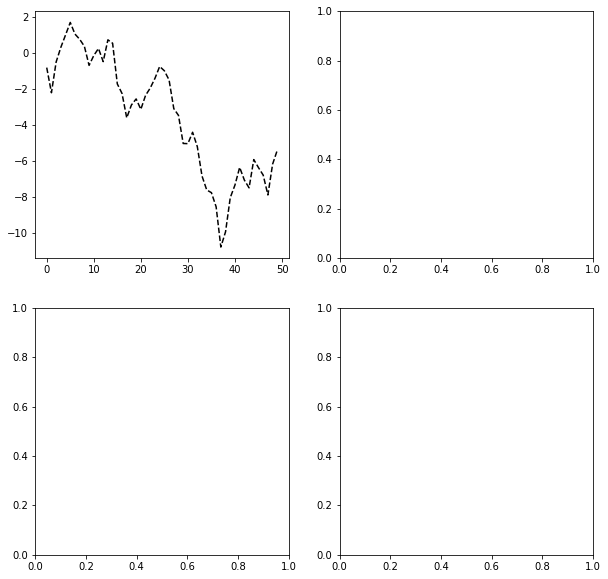

In [32]:
# first we create the figure, which is the 
# container where all plots reside

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 2, 1)
plt.plot(np.random.randn(50).cumsum(), 'k--')

ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
plt.show()

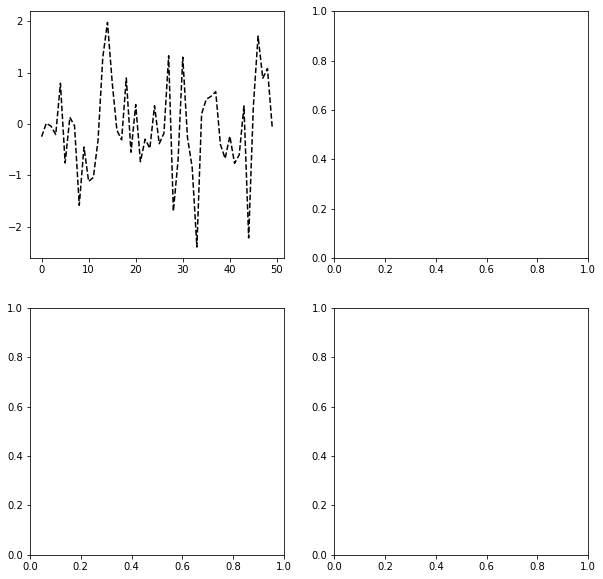

In [33]:
%matplotlib inline

# first we creta the figure, which is the 
# container where all plots reside
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 2, 1)
plt.plot(np.random.randn(50), 'k--')

ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

Each plot resides within a `Figure` object.

Each subsplot resides within an `AxesSubplot` object.

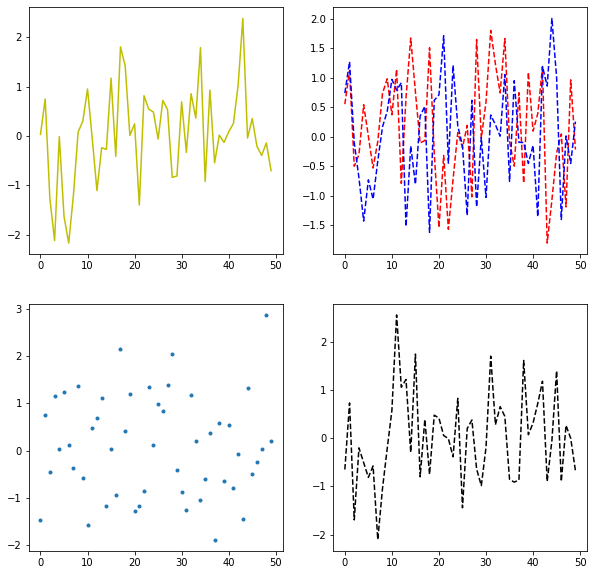

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,1].plot(np.random.randn(50), 'r--')
axes[0,1].plot(np.random.randn(50), 'b--')
axes[1,1].plot(np.random.randn(50), 'k--')
axes[1,0].plot(np.random.randn(50), '.')
axes[0,0].plot(np.random.randn(50), 'y-')
fig.set_size_inches(10, 10)

Let's plot the number of tweets mentioning one of the top 10 tokens over time.

In [61]:
# convert the created_at column to datetime

df_elon.created_at = pd.to_datetime(df_elon.created_at)

In [62]:
df_elon["year"] = df_elon.created_at.dt.year

In [63]:
df_elon.head()

,id,created_at,text,clean_text,year,word_in_tweet
0,849636868052275200,2017-04-05 14:56:29,'And so the robots spared humanity ... https:/...,robots spared humanity,2017,False
1,848988730585096192,2017-04-03 20:01:01,"""@ForIn2020 @waltmossberg @mims @defcon_5 Exac...",@ForIn2020 @waltmossberg @mims @defcon_5 Exact...,2017,True
2,848943072423497728,2017-04-03 16:59:35,"'@waltmossberg @mims @defcon_5 Et tu, Walt?'",@waltmossberg @mims @defcon_5 Walt,2017,False
3,848935705057280001,2017-04-03 16:30:19,'Stormy weather in Shortville ...',Stormy weather Shortville,2017,False
4,848416049573658624,2017-04-02 06:05:23,"""@DaveLeeBBC @verge Coal is dying due to nat g...",@DaveLeeBBC @verge Coal dying fracking It's ba...,2017,False


In [64]:
# Doing some filtering here. Can you spot what this code does?

top_tokens = [d[0] for d in dictionary_list if not d[0].startswith("@") and d[0][0].isupper()][:10]

In [65]:
top_tokens

['Tesla',
 'Model',
 'Falcon',
 'Dragon',
 'Will',
 'SpaceX',
 'Just',
 'This',
 'Autopilot',
 'Mars']

You see we could still do some filtering, e.g., to remove common words which are capitalized, but let's go on like this.

In [72]:
# count the number of tweets containing a certain word (or user name)

which_word = '@SpaceX' #Tesla

df_elon["word_in_tweet"] = df_elon.clean_text.apply(lambda x: which_word in x)

In [73]:
d = df_elon.groupby('year').word_in_tweet.agg('sum')

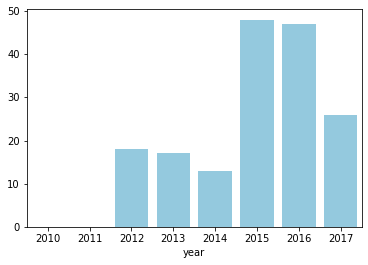

In [82]:
sns.barplot(d.index,d.values,color="skyblue")

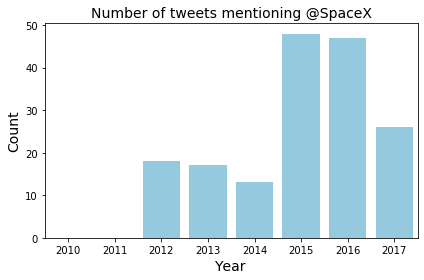

In [83]:
sns.barplot(d.index,d.values,color="skyblue")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Number of tweets mentioning %s"%which_word, fontsize=14)
plt.tight_layout()
plt.savefig("stuff/elon_plot.pdf")

Another question: how many tweets per month over time? We need to change the index and group..

In [90]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

In [91]:
df_elon.index = pd.to_datetime(df_elon['created_at'],format='%m/%d/%y %I:%M%p')

In [95]:
df_elon.groupby(pd.Grouper(freq='M')).agg('count')['id'][-10:]

created_at
2016-07-31    142
2016-08-31     39
2016-09-30     87
2016-10-31    102
2016-11-30     82
2016-12-31     50
2017-01-31    107
2017-02-28    137
2017-03-31    120
2017-04-30     13
Freq: M, Name: id, dtype: int64

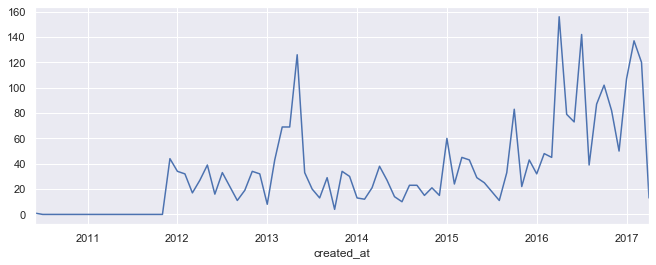

In [94]:
df_elon.groupby(pd.Grouper(freq='M')).agg('count')['id'].plot()

**Remark**: there is much more to this than plotting. Take a loot at the [Seaborn](https://seaborn.pydata.org/examples/index.html) or [Matplotlib](https://matplotlib.org/gallery.html) galleries for some compelling examples.

---

### Exercise 1.

* Plot the top n words together in a single figure, and show their trends over time.
* Do the same for the top n users mentioned.

In [ ]:
# Your code here

---